# Calculo Numérico
## Sistemas Lineares e Interpolação
Kauê Sales Barbosa de Sousa

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Parte 1: Sistemas Lineares

Implemente em Python as seguintes funções:

- eliminacao_gaussiana(A, b): Eliminação Gaussiana com pivoteamento parcial.
- jacobi(A, b, x0, tol, max_iter): Método de Jacobi.
- gauss_seidel(A, b, x0, tol, max_iter): Método de Gauss-Seidel.

Considerando que:

- A é a matriz dos coeficientes.
- b é o vetor de termos independentes.
- x0 é o chute inicial (para métodos iterativos).
- tol é a tolerância para o critério de parada (norma do resíduo).
- max_iter é o número máximo de iterações.

### Construção do sistema

In [ ]:
def gerar_matriz_diagonalmente_dominante(n, seed=None):
    if seed is not None:
        np.random.seed(seed)

    A = np.random.rand(n, n) * 10
    for i in range(n):
        row_sum = sum(abs(A[i][j]) for j in range(n) if j != i)
        A[i][i] = row_sum + np.random.rand() * 10 + 1  # Para garantir dominância
    return A

def gerar_sistema(n, seed=None):
    A = gerar_matriz_diagonalmente_dominante(n, seed=seed)
    x_true = np.random.rand(n)
    b = np.dot(A, x_true)
    return A, b, x_true

def matriz_diagonalmente_dominante(A):
    """
    Verifica se a matriz A é diagonalmente dominante por linhas.
    """
    n = A.shape[0]
    for i in range(n):
        soma = np.sum(np.abs(A[i])) - np.abs(A[i][i])
        if np.abs(A[i][i]) < soma:
            return False
    return True


In [3]:
# Gerar sistemas para n = 5, 50, 500
sizes = [5, 50, 500]
systems = {}

for i, size in enumerate(sizes):
    A, b, x_true = gerar_sistema(size, seed=42 + i)
    systems[size] = {
        'A': A,
        'b': b,
        'x_true': x_true
    }

### Eliminação Gaussiana

In [ ]:
import numpy as np

def eliminacao_gaussiana(A, b):
    """
    Resolve o sistema linear Ax = b usando eliminação de Gauss (sem pivoteamento).
    """
    A = A.astype(float) 
    b = b.astype(float)
    n = len(b)

    # Etapa de eliminação
    for i in range(n):
        # Verifica se o pivô é zero (sem pivoteamento neste caso)
        if A[i][i] == 0:
            raise ValueError("Pivô zero encontrado. Pivoteamento necessário.")

        for j in range(i + 1, n):
            fator = A[j][i] / A[i][i]
            A[j, i:] = A[j, i:] - fator * A[i, i:]
            b[j] = b[j] - fator * b[i]

    # Etapa de substituição regressiva
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        soma = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (b[i] - soma) / A[i][i]

    return x

In [ ]:
print("="*60)
print("Comparação: Eliminação Gaussiana vs Solução Exata (numpy)")
print("="*60)

for n in systems:
    A = systems[n]['A'].copy()
    b = systems[n]['b'].copy()
    x_true = systems[n]['x_true']

    # Tempo da eliminação gaussiana
    inicio = time.time()
    x_gauss = eliminacao_gaussiana(A, b)
    tempo_gauss = time.time() - inicio

    # Solução exata com numpy para referência
    x_np = np.linalg.solve(systems[n]['A'], systems[n]['b'])

    # Erros relativos
    erro_gauss = np.linalg.norm(x_gauss - x_true) / np.linalg.norm(x_true)
    erro_numpy = np.linalg.norm(x_np - x_true) / np.linalg.norm(x_true)

    print(f"\nSistema de tamanho n = {n}")
    print("-" * 50)
    print(f"{'Método':<25}{'Tempo (s)':<15}{'Erro relativo'}")
    print(f"{'Eliminação Gaussiana':<25}{tempo_gauss:<15.4e}{erro_gauss:.2e}")
    print(f"{'numpy.linalg.solve':<25}{'-':<15}{erro_numpy:.2e}")


Comparação: Eliminação Gaussiana vs Solução Exata (numpy)

Sistema de tamanho n = 5
--------------------------------------------------
Método                   Tempo (s)      Erro relativo
Eliminação Gaussiana     4.1962e-05     3.43e-16
numpy.linalg.solve       -              3.34e-16

Sistema de tamanho n = 50
--------------------------------------------------
Método                   Tempo (s)      Erro relativo
Eliminação Gaussiana     1.6990e-03     5.35e-16
numpy.linalg.solve       -              3.09e-16

Sistema de tamanho n = 500
--------------------------------------------------
Método                   Tempo (s)      Erro relativo
Eliminação Gaussiana     1.6229e-01     1.34e-15
numpy.linalg.solve       -              1.61e-15


### Método de Jacobi

In [6]:
def metodo_jacobi(A, b, x_inicial=None, tol=1e-10, max_iter=1000):
    n = len(b)
    if x_inicial is None:
        x = np.zeros(n)
    else:
        x = x_inicial.copy()

    x_novo = np.zeros(n)
    iteracoes = 0
    inicio = time.time()

    for k in range(max_iter):
        for i in range(n):
            soma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_novo[i] = (b[i] - soma) / A[i][i]

        if np.linalg.norm(x_novo - x, ord=np.inf) < tol:
            tempo_execucao = time.time() - inicio
            return x_novo, iteracoes + 1, tempo_execucao

        x[:] = x_novo[:]
        iteracoes += 1

    # Se não convergiu:
    tempo_execucao = time.time() - inicio
    raise Exception(f"Jacobi não convergiu em {max_iter} iterações.")


In [7]:
print("="*50)
print("Comparação: Método de Jacobi")
print("⚠ A Execução pode demorar. Há mensagens de erro para caso não haja conversão")
print("="*50)

for n in systems:
    A = systems[n]['A']
    b = systems[n]['b']
    x_true = systems[n]['x_true']

    print(f"\nSistema de tamanho n = {n}")
    print("-" * 50)

    if not matriz_diagonalmente_dominante(A):
        print("Matriz não é diagonalmente dominante. Método de Jacobi não é garantido.")
        continue

    try:
        x_jacobi, iteracoes, tempo_jacobi = metodo_jacobi(A, b, tol=1e-8, max_iter=1000)
        erro_jacobi = np.linalg.norm(x_jacobi - x_true) / np.linalg.norm(x_true)
        erro_numpy = np.linalg.norm(np.linalg.solve(A, b) - x_true) / np.linalg.norm(x_true)

        print(f"{'Método':<25}{'Tempo (s)':<15}{'Iterações':<12}{'Erro relativo'}")
        print(f"{'Jacobi':<25}{tempo_jacobi:<15.4e}{iteracoes:<12}{erro_jacobi:.2e}")
        print(f"{'numpy.linalg.solve':<25}{'-':<15}{'-':<12}{erro_numpy:.2e}")

    except Exception as e:
        print(f"Erro: {e}")

Comparação: Método de Jacobi
⚠ A Execução pode demorar. Há mensagens de erro para caso não haja conversão

Sistema de tamanho n = 5
--------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Jacobi                   5.1284e-04     74          5.15e-09
numpy.linalg.solve       -              -           3.34e-16

Sistema de tamanho n = 50
--------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Jacobi                   2.8066e-01     747         7.36e-09
numpy.linalg.solve       -              -           3.09e-16

Sistema de tamanho n = 500
--------------------------------------------------
Erro: Jacobi não convergiu em 1000 iterações.


### Gauss-Seidel

In [8]:
def metodo_gauss_seidel(A, b, x_inicial=None, tol=1e-10, max_iter=1000):
    """
    Resolve o sistema Ax = b usando o método iterativo de Gauss-Seidel.
    Retorna a solução aproximada, número de iterações e tempo de execução.
    """
    n = len(b)
    if x_inicial is None:
        x = np.zeros(n)
    else:
        x = x_inicial.copy()

    iteracoes = 0
    inicio = time.time()

    for k in range(max_iter):
        x_antigo = x.copy()
        for i in range(n):
            soma1 = sum(A[i][j] * x[j] for j in range(i))
            soma2 = sum(A[i][j] * x_antigo[j] for j in range(i + 1, n))
            x[i] = (b[i] - soma1 - soma2) / A[i][i]

        if np.linalg.norm(x - x_antigo, ord=np.inf) < tol:
            tempo_execucao = time.time() - inicio
            return x, iteracoes + 1, tempo_execucao

        iteracoes += 1

    tempo_execucao = time.time() - inicio
    raise Exception(f"Gauss-Seidel não convergiu em {max_iter} iterações.")


In [9]:
print("="*50)
print("Comparação: Método de Gauss-Seidel")
print("="*50)

for n in systems:
    A = systems[n]['A']
    b = systems[n]['b']
    x_true = systems[n]['x_true']

    print(f"\nSistema de tamanho n = {n}")
    print("-" * 50)

    if not matriz_diagonalmente_dominante(A):
        print("Matriz não é diagonalmente dominante. Método de Gauss-Seidel não é garantido.")
        continue

    try:
        x_gs, iteracoes, tempo_gs = metodo_gauss_seidel(A, b, tol=1e-8, max_iter=1000)
        erro_gs = np.linalg.norm(x_gs - x_true) / np.linalg.norm(x_true)
        erro_numpy = np.linalg.norm(np.linalg.solve(A, b) - x_true) / np.linalg.norm(x_true)

        print(f"{'Método':<25}{'Tempo (s)':<15}{'Iterações':<12}{'Erro relativo'}")
        print(f"{'Gauss-Seidel':<25}{tempo_gs:<15.4e}{iteracoes:<12}{erro_gs:.2e}")
        print(f"{'numpy.linalg.solve':<25}{'-':<15}{'-':<12}{erro_numpy:.2e}")

    except Exception as e:
        print(f"Erro: {e}")


Comparação: Método de Gauss-Seidel

Sistema de tamanho n = 5
--------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Gauss-Seidel             1.3185e-04     13          1.56e-09
numpy.linalg.solve       -              -           3.34e-16

Sistema de tamanho n = 50
--------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Gauss-Seidel             5.4271e-03     14          2.94e-10
numpy.linalg.solve       -              -           3.09e-16

Sistema de tamanho n = 500
--------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Gauss-Seidel             5.0860e-01     14          6.64e-10
numpy.linalg.solve       -              -           1.61e-15


### Comparação final

In [10]:
def imprimir_comparacao(n, resultados):
    print(f"\nSistema de tamanho n = {n}")
    print("-" * 70)
    print(f"{'Método':<25}{'Tempo (s)':<15}{'Iterações':<12}{'Erro relativo'}")
    for r in resultados:
        tempo = f"{r['tempo']:.4e}" if r['tempo'] is not None else "-"
        iteracoes = str(r['iteracoes']) if r['iteracoes'] is not None else "-"
        print(f"{r['nome']:<25}{tempo:<15}{iteracoes:<12}{r['erro']:.2e}")


In [ ]:
print("="*60)
print("COMPARATIVO FINAL DE MÉTODOS PARA SISTEMAS LINEARES")
print("="*60)

for n in systems:
    A = systems[n]['A'].copy()
    b = systems[n]['b'].copy()
    x_true = systems[n]['x_true']
    resultados = []

    # Eliminação Gaussiana
    try:
        inicio = time.time()
        x_gauss = eliminacao_gaussiana(A.copy(), b.copy())
        tempo = time.time() - inicio
        erro = np.linalg.norm(x_gauss - x_true) / np.linalg.norm(x_true)
        resultados.append({'nome': 'Eliminação Gaussiana', 'tempo': tempo, 'iteracoes': None, 'erro': erro})
    except Exception as e:
        resultados.append({'nome': 'Eliminação Gaussiana', 'tempo': None, 'iteracoes': None, 'erro': np.inf})

    # Jacobi
    if matriz_diagonalmente_dominante(A):
        try:
            x_jacobi, it_jacobi, tempo_jacobi = metodo_jacobi(A.copy(), b.copy(), tol=1e-8, max_iter=1000)
            erro_jacobi = np.linalg.norm(x_jacobi - x_true) / np.linalg.norm(x_true)
            resultados.append({'nome': 'Jacobi', 'tempo': tempo_jacobi, 'iteracoes': it_jacobi, 'erro': erro_jacobi})
        except Exception:
            resultados.append({'nome': 'Jacobi', 'tempo': None, 'iteracoes': None, 'erro': np.inf})
    else:
        resultados.append({'nome': 'Jacobi', 'tempo': None, 'iteracoes': None, 'erro': np.inf})

    # Gauss-Seidel
    if matriz_diagonalmente_dominante(A):
        try:
            x_gs, it_gs, tempo_gs = metodo_gauss_seidel(A.copy(), b.copy(), tol=1e-8, max_iter=1000)
            erro_gs = np.linalg.norm(x_gs - x_true) / np.linalg.norm(x_true)
            resultados.append({'nome': 'Gauss-Seidel', 'tempo': tempo_gs, 'iteracoes': it_gs, 'erro': erro_gs})
        except Exception:
            resultados.append({'nome': 'Gauss-Seidel', 'tempo': None, 'iteracoes': None, 'erro': np.inf})
    else:
        resultados.append({'nome': 'Gauss-Seidel', 'tempo': None, 'iteracoes': None, 'erro': np.inf})

    # numpy.linalg.solve
    try:
        inicio = time.time()
        x_np = np.linalg.solve(A, b)
        tempo_np = time.time() - inicio
        erro_np = np.linalg.norm(x_np - x_true) / np.linalg.norm(x_true)
        resultados.append({'nome': 'numpy.linalg.solve', 'tempo': tempo_np, 'iteracoes': None, 'erro': erro_np})
    except Exception:
        resultados.append({'nome': 'numpy.linalg.solve', 'tempo': None, 'iteracoes': None, 'erro': np.inf})

    imprimir_comparacao(n, resultados)


COMPARATIVO FINAL DE MÉTODOS PARA SISTEMAS LINEARES

Sistema de tamanho n = 5
----------------------------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Eliminação Gaussiana     4.1962e-05     -           3.43e-16
Jacobi                   4.8685e-04     74          5.15e-09
Gauss-Seidel             1.1587e-04     13          1.56e-09
numpy.linalg.solve       2.4080e-05     -           3.34e-16

Sistema de tamanho n = 50
----------------------------------------------------------------------
Método                   Tempo (s)      Iterações   Erro relativo
Eliminação Gaussiana     1.5922e-03     -           5.35e-16
Jacobi                   2.7953e-01     747         7.36e-09
Gauss-Seidel             5.2409e-03     14          2.94e-10
numpy.linalg.solve       6.2943e-05     -           3.09e-16

Sistema de tamanho n = 500
----------------------------------------------------------------------
Método                   Tempo (s)

## Parte 2: Interpolação Polinomial

In [12]:
def f(x):
    return np.sin(2 * np.pi * x) + 0.2 * np.cos(4 * np.pi * x) + 0.1 * x

In [ ]:
def gerar_dados():
    # Conjunto 1: 10 pontos igualmente espaçados em [0, 1]
    x1 = np.linspace(0, 1, 10)
    y1 = f(x1)

    # Conjunto 2: 20 pontos igualmente espaçados em [0, 1]
    x2 = np.linspace(0, 1, 20)
    y2 = f(x2)

    # Conjunto 3: 15 pontos aleatórios em [0, 1]
    np.random.seed(42)  # para reprodutibilidade
    x3 = np.sort(np.random.rand(15))
    y3 = f(x3)

    return (x1, y1), (x2, y2), (x3, y3)


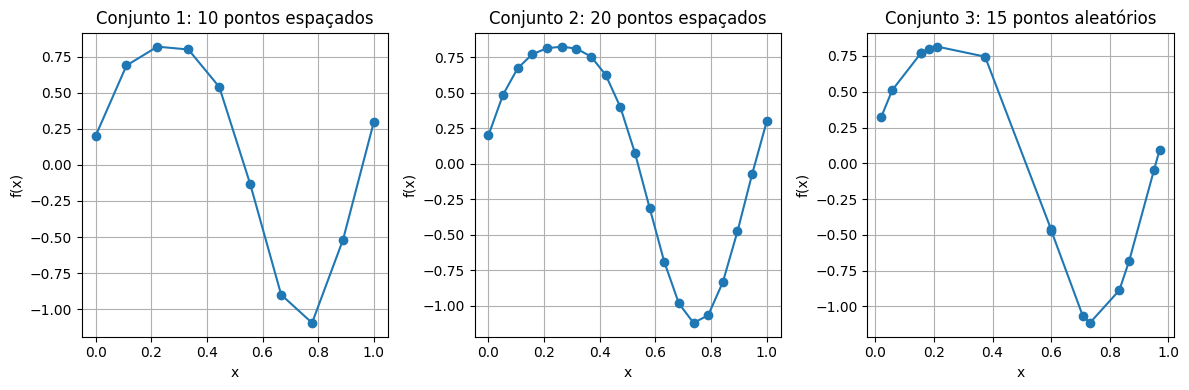

In [14]:
(x1, y1), (x2, y2), (x3, y3) = gerar_dados()

plt.figure(figsize=(12, 4))

for i, (x, y, titulo) in enumerate([
    (x1, y1, "Conjunto 1: 10 pontos espaçados"),
    (x2, y2, "Conjunto 2: 20 pontos espaçados"),
    (x3, y3, "Conjunto 3: 15 pontos aleatórios")
]):
    plt.subplot(1, 3, i + 1)
    plt.plot(x, y, 'o-', label='pontos')
    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


### Lagrange

In [15]:
def lagrange(x, y, x_interp):
    """
    Interpola os pontos (x, y) usando o método de Lagrange.
    Retorna os valores interpolados em x_interp.
    """
    n = len(x)
    y_interp = np.zeros_like(x_interp)

    for k, xk in enumerate(x_interp):
        soma = 0
        for i in range(n):
            termo = y[i]
            for j in range(n):
                if i != j:
                    termo *= (xk - x[j]) / (x[i] - x[j])
            soma += termo
        y_interp[k] = soma

    return y_interp


### Newton

In [16]:
def coeficientes_newton(x, y):
    """
    Calcula os coeficientes do polinômio interpolador de Newton com diferenças divididas.
    """
    n = len(x)
    coef = np.copy(y).astype(float)

    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])

    return coef


In [17]:
def newton(x, y, x_interp):
    """
    Interpola os pontos (x, y) usando o método de Newton.
    Retorna os valores interpolados em x_interp.
    """
    coef = coeficientes_newton(x, y)
    n = len(x)
    y_interp = np.zeros_like(x_interp)

    for k, xk in enumerate(x_interp):
        termo = coef[-1]
        for i in range(n - 2, -1, -1):
            termo = termo * (xk - x[i]) + coef[i]
        y_interp[k] = termo

    return y_interp

### Análise

In [18]:
import time

def avaliar_interpolacoes(x, y, nome_conjunto):
    """
    Compara os métodos de interpolação de Lagrange e Newton
    para os dados (x, y) sobre 1000 pontos no intervalo [0, 1].
    """
    print(f"\nAvaliação para {nome_conjunto}")
    print("=" * 60)

    # 1000 pontos de teste
    x_interp = np.linspace(0, 1, 1000)
    y_real = f(x_interp)

    resultados = []

    # --- LAGRANGE ---
    inicio = time.perf_counter()
    y_lagrange = lagrange(x, y, x_interp)
    tempo_lagrange = time.perf_counter() - inicio

    erro_abs_lagrange = np.abs(y_lagrange - y_real)
    erro_max_lagrange = np.max(erro_abs_lagrange)
    erro_medio_lagrange = np.mean(erro_abs_lagrange)

    resultados.append({
        'nome': 'Lagrange',
        'tempo': tempo_lagrange,
        'erro_max': erro_max_lagrange,
        'erro_medio': erro_medio_lagrange
    })

    # --- NEWTON ---
    inicio = time.perf_counter()
    y_newton = newton(x, y, x_interp)
    tempo_newton = time.perf_counter() - inicio

    erro_abs_newton = np.abs(y_newton - y_real)
    erro_max_newton = np.max(erro_abs_newton)
    erro_medio_newton = np.mean(erro_abs_newton)

    resultados.append({
        'nome': 'Newton',
        'tempo': tempo_newton,
        'erro_max': erro_max_newton,
        'erro_medio': erro_medio_newton
    })

    # --- Imprimir resultados ---
    print(f"{'Método':<15}{'Tempo (s)':<15}{'Erro Máx':<15}{'Erro Médio'}")
    for r in resultados:
        print(f"{r['nome']:<15}{r['tempo']:<15.4e}{r['erro_max']:<15.4e}{r['erro_medio']:.4e}")


In [19]:
(x1, y1), (x2, y2), (x3, y3) = gerar_dados()

avaliar_interpolacoes(x1, y1, "Conjunto 1 (10 pontos espaçados)")
avaliar_interpolacoes(x2, y2, "Conjunto 2 (20 pontos espaçados)")
avaliar_interpolacoes(x3, y3, "Conjunto 3 (15 pontos aleatórios)")



Avaliação para Conjunto 1 (10 pontos espaçados)
Método         Tempo (s)      Erro Máx       Erro Médio
Lagrange       1.6276e-02     2.7007e-02     4.5190e-03
Newton         1.2307e-03     2.7007e-02     4.5190e-03

Avaliação para Conjunto 2 (20 pontos espaçados)
Método         Tempo (s)      Erro Máx       Erro Médio
Lagrange       6.3092e-02     1.6746e-07     1.0133e-08
Newton         2.2669e-03     1.6746e-07     1.0133e-08

Avaliação para Conjunto 3 (15 pontos aleatórios)
Método         Tempo (s)      Erro Máx       Erro Médio
Lagrange       3.4995e-02     9.8353e-05     2.0351e-06
Newton         1.7275e-03     9.8353e-05     2.0351e-06
